# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
Objective:
Understand what factors influence the price of used cars to provide insights and recommendations to a used car dealership.

Key Questions:
What features of a car are most strongly correlated with its price? How do different car attributes like brand, model, mileage, age, and condition affect its price?

Success Criteria:
Provide actionable insights that can help the dealership optimize its pricing strategy and inventory.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# load the provided vehicle dataset provided.
used_cars = pd.read_csv("data/vehicles.csv")
print (used_cars.shape)
used_cars.describe()

(426880, 18)


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [4]:
used_cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [9]:
# Cleanup Missing  values
missing_values = used_cars.isnull().sum()
print(missing_values)

used_cars_data = used_cars.dropna()

# Dropping  id, region etc as they are not going to be used to calculate price

used_cars_data = used_cars_data.drop(['region','id','manufacturer', 'model'], axis=1).reset_index()


used_cars_data.shape
used_cars_data.describe()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


,index,price,year,odometer
count,34868.000000,34868.000000,34868.000000,3.486800e+04
mean,211889.840771,15837.446771,2011.176867,1.073991e+05
std,120553.589611,13460.056823,7.162332,9.990878e+04
min,126.000000,0.000000,1905.000000,0.000000e+00
25%,107485.750000,6500.000000,2008.000000,6.516400e+04
50%,208033.500000,12000.000000,2013.000000,1.040000e+05
75%,311208.250000,22003.500000,2016.000000,1.411678e+05
max,426836.000000,155000.000000,2022.000000,9.999999e+06


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

(34868, 15)

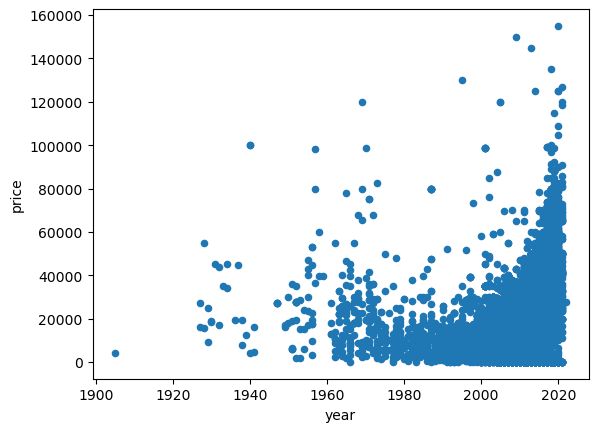

In [12]:
# plot price data on the chart to look for outliers

used_cars_data.plot(kind='scatter',x='year', y='price', style='o')

used_cars_data.shape

(31817, 16)

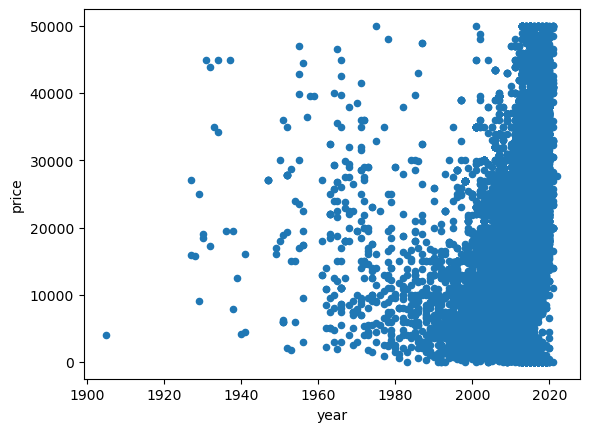

In [14]:
# lets remove data with price of the car = $0 or greater than $850,000 (this data point may change based on business feedback)

used_cars_data_clean = used_cars_data[used_cars_data['price'].gt(0) & used_cars_data['price'].lt(50000)].reset_index()

used_cars_data_clean.plot(kind='scatter',x='year', y='price', style='o')
used_cars_data_clean.shape

In [16]:
# Create new features or transform existing ones to better capture the relationships in the data
# Encoding Categorical Variables
used_cars_data_encoded = pd.get_dummies(used_cars_data_clean, drop_first=True)
used_cars_data_encoded

,level_0,index,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,3,215,4000,2002.0,155000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,219,2500,1995.0,110661.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,268,9000,2008.0,56700.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6,337,8950,2011.0,164000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,338,4000,1972.0,88100.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31812,34862,426785,23495,2015.0,146795.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
31813,34863,426788,12995,2016.0,61127.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
31814,34864,426792,32999,2014.0,154642.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
31815,34865,426793,15999,2018.0,36465.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
# VIF - measure of the multicollinearity in the independent features

def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog]
    X11, y11 = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X11,y11).score(X11,y11)

    # calc the VIF
    if(r_squared !=0):
        vif = 1/(1-r_squared)
    else:
        vif = 1
    vif_dict[exog] = vif
    
    print(pd.DataFrame({"VIF":vif_dict}))

  return pd.DataFrame({"VIF":vif_dict})

In [ ]:
# Find Collinearity between features
X1 = used_cars_data_encoded.drop('price', axis=1)
y1 = used_cars_data_encoded['price']
X1_train ,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
vif(X1.columns, X1).sort_values(by = 'VIF', ascending = False)

In [18]:
# Feature Scaling:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(used_cars_data_encoded.drop('price', axis=1))
#used_cars_scaled = pd.DataFrame(scaled_features, columns=used_cars_data_encoded.columns.drop('price'))
#used_cars_scaled['price'] = used_cars_data['price']
#used_cars_scaled.dropna()
used_cars_scaled = pd.DataFrame(scaled_features, columns=used_cars_data_encoded.columns.drop('price'))
used_cars_scaled.tail()
print(used_cars_scaled.shape)
print(used_cars_data_encoded.shape)

(31817, 20453)
(31817, 20454)


In [19]:
# Introspect the data and add the price feature back to the dataframe
used_cars_data_encoded['price']
used_cars_scaled['price'] = used_cars_data_encoded['price']
used_cars_scaled

,level_0,index,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,price
0,-1.718906,-1.743132,-1.236103,0.433663,-0.124806,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,-0.050520,4000
1,-1.718807,-1.743099,-2.214230,0.002106,8.012414,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,-0.050520,2500
2,-1.718708,-1.742695,-0.397709,-0.523103,-0.124806,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,-0.050520,9000
3,-1.718609,-1.742126,0.021489,0.521262,-0.124806,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,-0.050520,8950
4,-1.718510,-1.742117,-5.428077,-0.217483,8.012414,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,-0.050520,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31812,1.727064,1.776783,0.580419,0.353803,-0.124806,-0.659551,2.788312,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,19.794001,23495
31813,1.727163,1.776808,0.720151,-0.480015,-0.124806,-0.659551,2.788312,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,19.794001,12995
31814,1.727262,1.776841,0.440686,0.430179,-0.124806,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,19.794001,32999
31815,1.727361,1.776849,0.999616,-0.720053,-0.124806,-0.659551,-0.358640,-0.06648,-0.033656,-0.017731,...,-0.165375,-0.203314,-0.068129,-0.175815,-0.14633,-0.09903,-0.188791,-0.052664,19.794001,15999


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


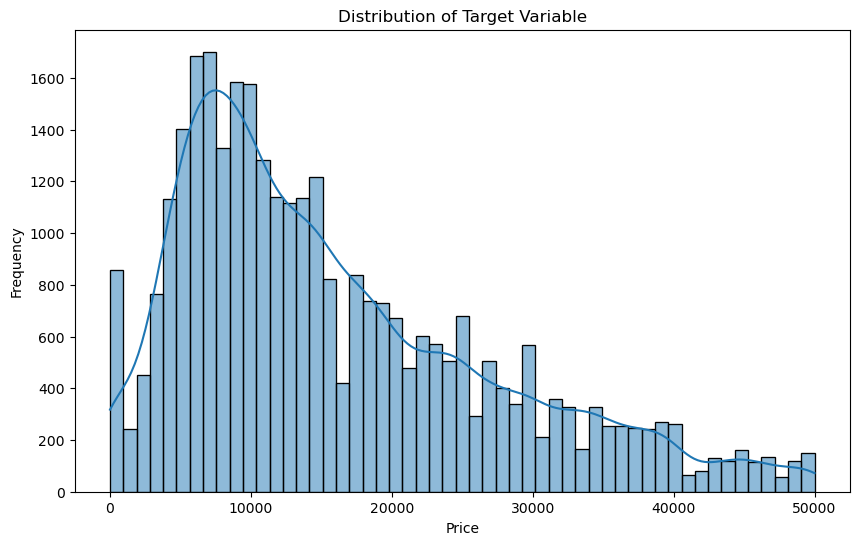

In [20]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(used_cars_scaled['price'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(used_cars_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Features to be used to build the model going forward
print (used_cars_scaled.columns)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
#Splitting the data
X = used_cars_scaled.drop('price', axis=1)
y = used_cars_scaled['price']
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_liner = r2_score(y_test, y_pred_linear)
print ('MSE : ' + str(mse_linear))
print ('R2 : ' + str(r2_liner))

In [ ]:
#Ridge
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print ('MSE Ridge: ' + str(mse_ridge))
print ('R2 Ridge: ' + str(r2_ridge))

In [ ]:
#Lasso
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print ('MSE Lasso: ' + str(mse_lasso))
print ('R2 Lasso: ' + str(r2_lasso))

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Linear Regression with Cross-Validation
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Linear Regression Cross-Validation MAE Scores:", -linear_cv_scores)
print("Linear Regression Cross-Validation Mean MAE:", -np.mean(linear_cv_scores))

In [ ]:
# Lasso Regression with GridSearchCV
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_absolute_error')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_['alpha'])
print("Best Lasso CV Score:", -lasso_grid.best_score_)

In [ ]:
# Ridge Regression with GridSearchCV
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_['alpha'])
print("Best Ridge CV Score:", -ridge_grid.best_score_)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Train the models with the best hyperparameters
best_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'])
best_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])

best_lasso.fit(X_train, y_train)
best_ridge.fit(X_train, y_train)

# Make predictions
linear_pred_eval = linear_model.fit(X_train, y_train).predict(X_test)
lasso_pred_eval = best_lasso.predict(X_test)
ridge_pred_eval = best_ridge.predict(X_test)

# Evaluate the models
linear_mae_eval = mean_absolute_error(y_test, linear_pred_eval)
linear_mse_eval = mean_squared_error(y_test, linear_pred_eval)
linear_r_squared_eval = linear_model.score(X_test, y_test)

lasso_mae_eval = mean_absolute_error(y_test, lasso_pred_eval)
lasso_mse_eval = mean_squared_error(y_test, lasso_pred_eval)
lasso_r_squared_eval = best_lasso.score(X_test, y_test)

ridge_mae_eval = mean_absolute_error(y_test, ridge_pred_eval)
ridge_mse_eval = mean_squared_error(y_test, ridge_pred_eval)
ridge_r_squared_eval = best_ridge.score(X_test, y_test)

print(f'Linear Regression MAE: {linear_mae_eval}')
print(f'Linear Regression MSE: {linear_mse_eval}')
print(f'Linear Regression R-squared: {linear_r_squared_eval}\n')

print(f'Lasso Regression MAE: {lasso_mae_eval}')
print(f'Lasso Regression MSE: {lasso_mse_eval}')
print(f'Lasso Regression R-squared: {lasso_r_squared_eval}\n')

print(f'Ridge Regression MAE: {ridge_mae_eval}')
print(f'Ridge Regression MSE: {ridge_mse_eval}')
print(f'Ridge Regression R-squared: {ridge_r_squared_eval}\n')

In [ ]:
#Interpretation of the results
y_pred_lasso = best_lasso.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
actual_vs_predicted_df.head(20)

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
# Get the coefficients and the intercept from the best Lasso model

coefficients = pd.Series(best_lasso.coef_, index=X_train.columns)
intercept = best_lasso.intercept_

coefficients_df = pd.DataFrame(coefficients)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print("Lasso Regression Coefficients:")
print(coefficients_df)
print("\nIntercept:", intercept)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
##

Conclusions:
When all features are neglected, the average price of a used car a dealer can expect is $16,999.

Inventory strategy: The best inventory strategy for the dealer of the used car would be to stock newer model car that has less odometer reading, probably an electric or hybrid and it has to be a truck or a full size SUV. Another strategy the car dealer should ensure they have is to open offices in Tennessee or Vermont and avoid dealership in California or Florida.

Pricing strategy: The dealership should price the base price of a car as $16,835. and then based on the features such as make, model, zip, fuel efficiency, odometer reading, can move the price higher or lower